## Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
main_df = pd.read_csv('train.csv')
final_df = pd.read_csv('test.csv')

In [3]:
main_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
main_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
final_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
final_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Analysis

In [9]:
age_bins = np.arange(0,90,20)
age_bins

array([ 0, 20, 40, 60, 80])

In [10]:
df_age = pd.DataFrame()
df_age['Survived'] = main_df['Survived']
df_age['Age'] = main_df['Age']
df_age['Sex'] = main_df['Sex']
df_age['AgeGroup'] = pd.cut(main_df['Age'], bins=age_bins)

df_male = df_age[df_age['Sex']=='male']
df_male =df_male.rename(columns={'AgeGroup': 'Male Age'})

df_female = df_age[df_age['Sex']=='female']
df_female = df_female.rename(columns={'AgeGroup': 'Female Age'})

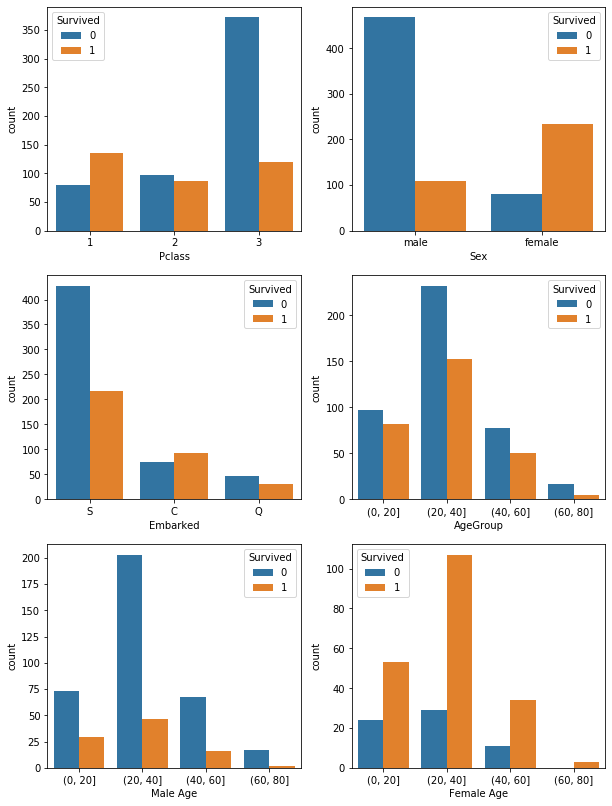

In [11]:
fig=plt.figure(figsize=[10,14])

fig.add_subplot(3,2,1)
sns.countplot(x='Pclass',hue='Survived',data=main_df)

fig.add_subplot(3,2,2)
sns.countplot(x='Sex',hue='Survived',data=main_df)

fig.add_subplot(3,2,3)
sns.countplot(x='Embarked',hue='Survived',data=main_df)

fig.add_subplot(3,2,4)
sns.countplot(x='AgeGroup',hue='Survived',data=df_age)

fig.add_subplot(3,2,5)
sns.countplot(x='Male Age',hue='Survived',data=df_male)

fig.add_subplot(3,2,6)
sns.countplot(x='Female Age',hue='Survived',data=df_female)

# # Also a good idea to visualize the Age correlation:
# g = sns.FacetGrid(main_df, col='Survived')
# g.map(plt.hist, 'Age', bins=20)

plt.show()

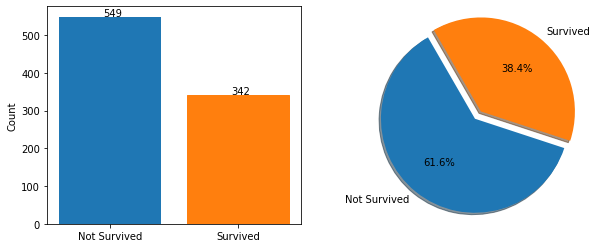

In [12]:
labels = ['Not Survived','Survived']
explode = (0, 0.1)
survivors_data = [main_df[main_df['Survived']==0].count()[0],main_df[main_df['Survived']==1].count()[0]]

fig = plt.figure(figsize=[10,4])

ax1 = fig.add_subplot(1,2,1)
barplot = plt.bar(labels,
                  survivors_data,
                  align='center')
barplot[1].set_color('C1')
plt.ylabel('Count')

for i, v in enumerate(survivors_data): #display numbers above bars
    ax1.text(i-0.05, v+2, str(v))

ax2 = fig.add_subplot(1,2,2)
ax2.pie(survivors_data,
        labels=labels,
        explode = explode,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=120)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

### Dealing with Missing and Categorical values

In [13]:
both_df = pd.concat([main_df, final_df], sort=True)
both_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


##### Missing values on features: Age, Cabin, Embarked and Fare.

In [14]:
male_age_mean = round(both_df[both_df['Sex']=='male']['Age'].mean())
female_age_mean = round(both_df[both_df['Sex']=='female']['Age'].mean())
ages_mean = {'male':male_age_mean, 'female':female_age_mean}
ages_mean

{'male': 31.0, 'female': 29.0}

In [15]:
title_names = {}

for name in both_df['Name']:
    title = name.split(',')[1].split('.')[0].strip(' ')
    if title in title_names:
        title_names[name.split(',')[1].split('.')[0].strip(' ')] += 1
    else:
        title_names[name.split(',')[1].split('.')[0].strip(' ')] = 1
        
title_names        

{'Mr': 757,
 'Mrs': 197,
 'Miss': 260,
 'Master': 61,
 'Don': 1,
 'Rev': 8,
 'Dr': 8,
 'Mme': 1,
 'Ms': 2,
 'Major': 2,
 'Lady': 1,
 'Sir': 1,
 'Mlle': 2,
 'Col': 4,
 'Capt': 1,
 'the Countess': 1,
 'Jonkheer': 1,
 'Dona': 1}

In [16]:
counter = 1
names = {}
removal_list = []

for name in title_names:
    if title_names[name] > 100:
        names[name] = counter
        counter += 1
        removal_list.append(name)

names['*Rare*'] = 0 # '*' to avoid an unintended match
names    

{'Mr': 1, 'Mrs': 2, 'Miss': 3, '*Rare*': 0}

In [17]:
fare_by_class = {}

for pclass in [1,2,3]:
    fare_by_class[pclass] = both_df[both_df['Pclass']==pclass]['Fare'].mean()
    
fare_by_class    

{1: 87.50899164086688, 2: 21.1791963898917, 3: 13.302888700564973}

In [18]:
cabins_number = {}

for cabin in both_df['Cabin']:
    if pd.notna(cabin):
        if cabin[0] in cabins_number:
            cabins_number[cabin[0]] += 1
        else:
            cabins_number[cabin[0]] = 1
        
cabins_number

{'C': 94, 'E': 41, 'G': 5, 'D': 46, 'A': 22, 'B': 65, 'F': 21, 'T': 1}

In [19]:
cabins = {}

for n, letter in enumerate(list(cabins_number)):
    cabins[letter] = n
    
cabins    

{'C': 0, 'E': 1, 'G': 2, 'D': 3, 'A': 4, 'B': 5, 'F': 6, 'T': 7}

In [20]:
cabins_list = []
cabins_by_class = {}

for pclass in [1,2,3]:
    for cabin in both_df[both_df['Pclass']==pclass]['Cabin']:
        if pd.notna(cabin):
            cabins_list.append(cabin[0])
    most_common = Counter(cabins_list).most_common(1)
    cabins_by_class[pclass]=most_common
    cabins_list = []
    
cabins_by_class #use indexes [0][0] to acess the cabin letter, i.e. 'cabins_by_class[1][0][0]' for First Class

{1: [('C', 94)], 2: [('F', 13)], 3: [('F', 8)]}

In [21]:
genders = {'male':0, 'female':1}
ports = {'C':0, 'Q':1, 'S':2}

In [22]:
def preprocess(df):
    
    df['Family'] = df['SibSp'] + df['Parch']
    
    for n,age in enumerate(df['Age']):
        if pd.isna(age):
            df.at[n,'Age'] = ages_mean[both_df.iloc[n]['Sex']]
            
    df['Sex'] = df['Sex'].map(genders)
    
    for n,cabin in enumerate(df['Cabin']):
        if pd.notna(cabin):
            df.at[n,'Cabin'] = cabins[cabin[0]]
        else:
            cabin_letter = cabins_by_class[df.iloc[n]['Pclass']][0][0] # Fill with the most common by 'Pclass'
            df.at[n,'Cabin'] = cabins[cabin_letter]
    
    df['Embarked'].fillna('S', inplace=True) # Fill with the most common
    df['Embarked'] = df['Embarked'].map(ports)
    
    for n,fare in enumerate(df['Fare']):
        if pd.isna(fare):
            df.at[n,'Fare'] = fare_by_class[df.iloc[n]['Pclass']]
    
    for n,name in enumerate(df['Name']):
        if name.split(',')[1].split('.')[0].strip(' ') in names:
            df.at[n,'Name'] = names[name.split(',')[1].split('.')[0].strip(' ')]
        else: # Just in case
            df.at[n,'Name'] = names['*Rare*']
    
    df = df.drop(['PassengerId','Ticket','SibSp','Parch'], axis=1)
    
    return df

In [23]:
main_df = preprocess(main_df)
main_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,1,0,22.0,7.2500,6,2,1
1,1,1,2,1,38.0,71.2833,0,0,1
2,1,3,3,1,26.0,7.9250,6,2,0
3,1,1,2,1,35.0,53.1000,0,2,1
4,0,3,1,0,35.0,8.0500,6,2,0


In [24]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null int64
Family      891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


## Train/Test Split

In [25]:
X = main_df.drop(['Survived'], axis=1)
y = main_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_train.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
825,3,1,0,31.0,6.9500,6,1,0
8,3,2,1,27.0,11.1333,6,2,2
689,1,3,1,15.0,211.3375,5,2,1
513,1,2,1,54.0,59.4000,0,0,1
729,3,3,1,25.0,7.9250,6,2,1


In [26]:
y_train.head()

825    0
8      1
689    1
513    1
729    0
Name: Survived, dtype: int64

## Balancing Data (Over-sampling)

In [27]:
len(X)

891

In [28]:
y_train.mean()

0.3782771535580524

In [29]:
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [30]:
y_train.mean()

0.5

In [31]:
len(X_train)

996

## Building Decision Tree

In [32]:
dt = DecisionTreeClassifier(random_state=101)

print('CV score:', cross_val_score(dt, X_train, y_train, cv = 3).mean())

CV score: 0.7981927710843374


## Building Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=101)

print('CV score:', cross_val_score(rf, X_train, y_train, cv = 3).mean())

CV score: 0.8283132530120483


## Building SVM

In [34]:
svm = SVC(gamma='auto',random_state=101)

print('CV score:', cross_val_score(svm, X_train, y_train, cv = 3).mean())

CV score: 0.7730923694779116


## Building KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=1000, p=1)

print('CV score:', cross_val_score(knn, X_train, y_train, cv = 3).mean())

CV score: 0.8072289156626505


## Building Logistic Regression

In [36]:
lr = LogisticRegression(random_state=101, solver='lbfgs', max_iter=500) #Parameters added to disable warnings

print('CV score:', cross_val_score(lr, X_train, y_train, cv = 3).mean())

CV score: 0.7901606425702812


## Hyperparameters tuning (Random Forest)

In [37]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [38]:
rf_grid = RandomForestClassifier(random_state=101) # creates a new estimator

# Create the parameter grid based on the results of random search 
param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10],
              'n_estimators': [100, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

In [39]:
# Fit the grid search to the data and show the best parameters
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   43.0s finished


{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [40]:
best_grid = grid_search.best_estimator_
best_grid # Note that it's a classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [41]:
print('CV score:', cross_val_score(best_grid, X_train, y_train, cv=3).mean())
print('RF Test Score:', best_grid.score(X_test, y_test))

CV score: 0.8413654618473895
RF Test Score: 0.8


## Checking importances

In [42]:
best_grid.feature_importances_

array([0.09612896, 0.21377634, 0.22423742, 0.14147417, 0.16879934,
       0.05283777, 0.03223055, 0.07051545])

In [43]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(best_grid.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.224
Name,0.214
Fare,0.169
Age,0.141
Pclass,0.096
Family,0.071
Cabin,0.053
Embarked,0.032


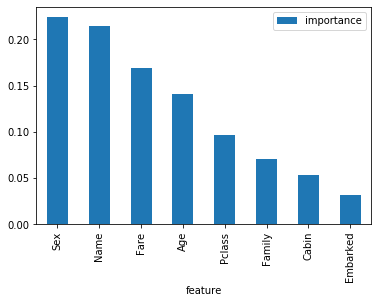

In [44]:
importances.plot.bar()
plt.show()

## Final Prediction

In [45]:
submission_df = preprocess(final_df)
submission_df.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,0,34.5,7.8292,6,1,0
1,3,2,1,47.0,7.0000,6,2,1
2,2,1,0,62.0,9.6875,6,1,0
3,3,1,0,27.0,8.6625,6,2,0
4,3,2,1,22.0,12.2875,6,2,2


In [46]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null int64
Family      418 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [47]:
final_prediction = best_grid.predict(submission_df)
final_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [48]:
final = pd.concat([final_df['PassengerId'],pd.DataFrame(final_prediction, columns=['Survived'])], axis=1)
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Writing on CSV file

In [49]:
with open('submission.csv','w') as csv_file:
    csv_file.write('PassengerId,Survived\n')
    
    for _,row in final.iterrows():
        text = str(row['PassengerId'])+','+str(row['Survived'])
        csv_file.write(text+'\n')